### Import data

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from time import time
%matplotlib inline
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

In [2]:
df = pd.read_csv('output.csv')
df.head()

,ID,Gender,Birthdate
0,8226684,female,1953-08-13
1,9132363,male,1964-07-26
2,26067,male,1922-01-08
3,8434499,female,1980-04-28
4,121365,male,1958-07-16


In [3]:
import os 
files = glob.glob("*.csv")
files.remove("output.csv")
files

['bmi.csv',
 'cholesterol_2.csv',
 'glucose.csv',
 'high_pressure.csv',
 'systolic_blood_pressure.csv']

In [4]:
#Concat different files together
list_df = [pd.read_csv(f) for f in files]
var_df = pd.concat(list_df,axis=1)
df = pd.concat([df,var_df],axis=1)
df.head()

,ID,Gender,Birthdate,ID,BMI,ID,Cholesterol,ID,Glucose,ID,Time_of_high_blood_pressure,ID,Systolic blood pressure
0,8226684,female,1953-08-13,8226684,30.48,8226684,193.03,0,0.00,0,0,8226684,114
1,9132363,male,1964-07-26,9132363,30.39,9132363,189.68,0,0.00,9132363,3,9132363,135
2,26067,male,1922-01-08,26067,30.29,26067,178.19,26067,69.16,26067,3,26067,138
3,8434499,female,1980-04-28,8434499,29.02,8434499,190.90,0,0.00,0,0,8434499,105
4,121365,male,1958-07-16,121365,31.03,121365,175.90,121365,64.51,121365,1,121365,117


### Process data  

In [5]:
df['Age'] = pd.to_datetime('today').year-pd.to_datetime(df['Birthdate']).dt.year
df = df.drop('Birthdate',1)
df = df.drop('ID',1)
#Transform measurement of cholesterol to nmol/L
df["Cholesterol"] = df["Cholesterol"]/38.67
df.head()

,Gender,BMI,Cholesterol,Glucose,Time_of_high_blood_pressure,Systolic blood pressure,Age
0,female,30.48,4.991725,0.00,0,114,67
1,male,30.39,4.905094,0.00,3,135,56
2,male,30.29,4.607965,69.16,3,138,98
3,female,29.02,4.936643,0.00,0,105,40
4,male,31.03,4.548746,64.51,1,117,62


Transform the numerical cholesterol to the category of Low, Normal and High. After that, I trnasform it to label of 0, 1 and 2 respectively

In [6]:
n_high = len(df[df["Cholesterol"]>5.5])
n_low = len(df[df["Cholesterol"]<3.9])
print("Total number of records greater than 5.5 nmol/L: {}".format(n_high))
print("Total number of records less than 3.9 nmol/L: {}".format(n_low))

Total number of records greater than 5.5 nmol/L: 251
Total number of records less than 3.9 nmol/L: 8


In [7]:
#Transform to categorical value of Low, Normal and High
bins = [0, 3.9, 5.5, 50]
names = ['Low', 'Normal', 'High']
df['Cholesterol'] = pd.cut(df['Cholesterol'], bins, labels=names)
df= df.dropna()

In [8]:
#Pass it to separate dataframe
raw_value = df["Cholesterol"]
#Drop cholesterol column in datafram
df = df.drop("Cholesterol", 1)
value = raw_value.apply(lambda x: 0 if x == "Low" else (1 if x == "Normal" else 2))
#Create asample of 5
value.head()

0    1
1    1
2    1
3    1
4    1
Name: Cholesterol, dtype: category
Categories (3, int64): [0 < 1 < 2]

Label encoding for gender data

In [9]:
#Label encoding cholesterol and gender columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"].astype(str))
df.head()

,Gender,BMI,Glucose,Time_of_high_blood_pressure,Systolic blood pressure,Age
0,0,30.48,0.00,0,114,67
1,1,30.39,0.00,3,135,56
2,1,30.29,69.16,3,138,98
3,0,29.02,0.00,0,105,40
4,1,31.03,64.51,1,117,62


When I download the data, I notice that there are a massive number of 0 time of high blood pressure. This makes our data imbalance. I plot it out and then use log transformation to decrease the impact of any very high value to the dataset

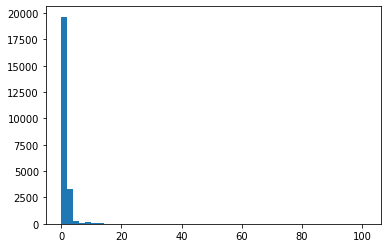

In [10]:
fig = plt.hist(df['Time_of_high_blood_pressure'], bins =50)
plt.show(fig)

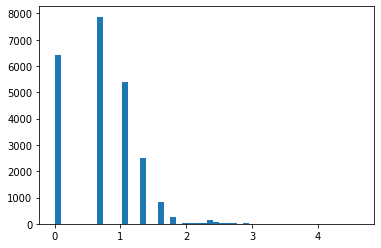

In [11]:
# Log-transform the skewed features
skewed = ['Glucose', 'Time_of_high_blood_pressure']
features_log_transformed = pd.DataFrame(data = df)
features_log_transformed[skewed] = df[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
fig = plt.hist(features_log_transformed['Time_of_high_blood_pressure'], bins =50)
plt.show(fig)

### Normalize data

In [12]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = ['BMI', 'Glucose', 'Time_of_high_blood_pressure', 'Systolic blood pressure', 'Age']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
features_log_minmax_transform.head(n = 5)

,Gender,BMI,Glucose,Time_of_high_blood_pressure,Systolic blood pressure,Age
0,0,0.189495,0.000000,0.000000,0.165049,0.500000
1,1,0.188640,0.000000,0.299741,0.368932,0.377778
2,1,0.187690,0.810310,0.299741,0.398058,0.844444
3,0,0.175627,0.000000,0.000000,0.077670,0.200000
4,1,0.194719,0.797238,0.149871,0.194175,0.444444


### Creating a Training and Predicting Pipeline

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transform, 
                                                    raw_value, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 18974 samples.
Testing set has 4744 samples.


In [14]:
#Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    #Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #Calculate the total prediction time
    results['pred_time'] = end - start
            
    #Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    #Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta = 0.5, pos_label=1, average=None)
        
    #Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5, pos_label=1, average=None)
       
    #Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
# TODO: Initialize the three models
clf_A = SVC( random_state = 5, gamma ='scale')
clf_B = KNeighborsClassifier()
clf_C = AdaBoostClassifier(random_state=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

SVC trained on 189 samples.
SVC trained on 1897 samples.
SVC trained on 18974 samples.
KNeighborsClassifier trained on 189 samples.
KNeighborsClassifier trained on 1897 samples.
KNeighborsClassifier trained on 18974 samples.
AdaBoostClassifier trained on 189 samples.
AdaBoostClassifier trained on 1897 samples.
AdaBoostClassifier trained on 18974 samples.


In [16]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,8))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    pl.show()

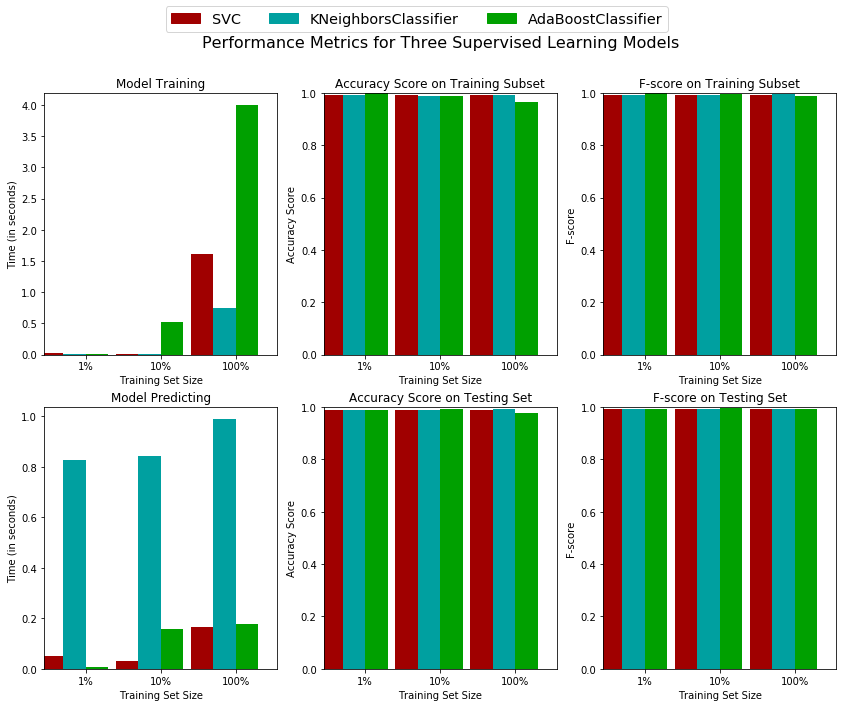

In [17]:
evaluate(results)

In [18]:
clf = AdaBoostClassifier(random_state=5)
#Train the supervised model on the training set 
model = clf.fit(X_train,y_train)

#Extract the feature importances
importances = clf.feature_importances_
importances

array([0.02, 0.14, 0.52, 0.  , 0.04, 0.28])